## General purpose of this Notebook

The objetive of this notebook is to answer the following questions from article 2 forming clusters and measure their respective efficiency using DEA analysis.

## Expected Results

The expected results is a general introduction of 5Sensu model, the formation of very different clusters and the presentation of DEA analysis and modification, a ranking of best clusters according to efficiency 

## Reference

In [312]:
#https://stackoverflow.com/questions/44929118/minimizing-multi-objective-function-using-deap

## Data packages

In [313]:
##DEFAULT PACKAGE

import os
from numpy import array
import seaborn as sns
import numpy as np
import random
import pandas  as pd
import warnings
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline


#EVOLUTIONARY ALGO PACK

from deap import base, creator, tools, algorithms


#DATA ANALYSIS ENVELOPMENT PACKAGE

os.chdir("/home/pauloyun/Documentos/model-canastra/pyDEA/pydea")

import dea
import tools
import plot


#IDE ADJUSTMENT

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

#DATA RETRIEVE

os.chdir("/home/pauloyun/Documentos/model-canastra")

raw_df = pd.read_csv("df_canastra.csv").sample(frac=1)
raw_df.head(1)

,QUEST,S_01_GPS_PONTO,S_02_ESTE,S_03_NORTE,S_04_ALTITUDE,S_05_FOTO,S_06_MUNICIPIO,S_07_DISTANCIA_AO_CENTRO,S_08_DISTRITO,S_09_COMUNIDADE,S_10_NOME_ENTREVISTADO,S_11_SEXO,S_12_FUNCAO_PROPRIEDADE,S_13_NOME_PROPRIETARIO,S_14_APELIDO,S_15_IDADE,S_16_SEXO,S_17_TELEFONE_CONTATO,S_18_RG,S_19_CPF,S_20_NOME_PROPRIEDADE,S_21_AREA_PROPRIEDADE,S_22_POSSUI_ENERGIA_ELETRICA,S_23_CASO_POSITIVO_QUANTOS_KVA,S_24_POSSUI_NUMERO_INSCRICAO_PRODUTOR,S_24_1_NUMERO_INSCRICAO,S_25_E_COOPERADO_SARONCRED,S_26_CASO_NAO_COOPERADO_MOTIVO,S_27_E_COOPERADO_A_APROCAN,S_28_CASO_NAO_ASSOCIADO_MOTIVO,S_29_SITUACAO_CADASTRAL_IMA,S_30_NUMERO_CADASTRO_IMA,S_31_CASO_CADASTRADO_IMA_VANTAGENS,S_32_SITUAÇÃO_CADASTRAL_JUNTO_A_SIF,S_33_NUMERO_SIF,S_34_SE_CADASTRADO_SIF_VANTAGENS,S_35_PRINCIPAIS_RACAS_UTILIZADAS,S_36_1_PASTAGEM_BRAQUIÁRIA_%,S_36_2_PASTAGEM_CAPIM_GORDURA_%,S_36_3_PASTAGEM_NATIVA_%,S_36_4_PASTAGEM_PROVISÓRIA_%,S_36_5_PASTAGEM_OUTROS_%,S_37_SISTEMA_DE_PRODUÇÃO,S_38_CASO_SEJA_A_PASTO,S_39_SUPLEMENTAÇÃO_ALIMENTAR,S_40_SUPLEMENTAÇÃO_MINEIRAL,S_41_POSSUI_TRONCO_E_BEZERRO,S_42_POSSUI_SALA_DE_ORDENHA,S_43_SALA_DE_ORDENHA_É_COBERTA,S_44_SALA_DE_ORDENHA_É_CIMENTADA,S_45_POSSUI_ORDENHA_MECÂNICA,S_46_QUANTAS_ORDENHAS_DIÁRIAS,S_47_ORDENHA,S_48_PRODUÇÃO_LEITE_MANHA_DIA,S_49_PRODUÇÃO_LEITE_A_TARDE_DIA,S_50_PRODUÇÃO_TOTAL_DE_LEITE_DIA,S_51_POSSUI_SALA_ÁREA_DE_ESPERA,S_52_CURRAL_É_CALÇADO,S_53_TEM_PONTO_DE_ÁGUA,S_54_SE_POSSUI_A_ÁGUA_É_CLORADA,S_55_POSSUI_IMPLANTADA_AS_BPF,S_56_POSSUI_TREINAMENTO_EM_BPF,S_57_FAZ_LIMPEZA_DOS_UTENSÍLIOS,S_58_FAZ_LIMPEZA_DOS_TETOS_ANTES_DA_ORDENHA,S_59_FAZ_SECAGEM_DO_ÚBERE,S_60_REALIZA_TESTE_MASTITE,S_61_CASO_REALIZE_TESTE_MASTITE_QUAL_FAZ,S_62_FAZ_TRATAMENTO_MASTITE,S_63_FAZ_TRATAMENTO_MASTITE_NAS_VACAS_MAGRAS,S_64_EM_CASO_USO_DE_ANTIBIÓTICOS_FICA_SEM_TIRAR_LEITE,S_65_INFRAESTRUTURA_E_BENFEITORIAS_EXISTENTES,S_66_NÚMERO_VACAS_EM_LACTAÇÃO,S_67_NÚMERO_TOTAL_REBANHO_LEITEIRO,S_68_QUAIS_AS_VACINAS_APLICADAS_NO_REBANHO,S_69_QUAIS_EXAMES_REALIZADOS,S_70_DESTINO_ANIMAIS_SORO_POSITIVOS,S_71_FAZ_MARCAÇÃO_DOS_ANIMAIS,S_72_1_DESTINO_PRODUÇÃO_QUEIJO_LOCAL_%,S_72_2_DESTINO_PRODUÇÃO_QUEIJO_REGIONAL_%,S_72_3_DESTINO_PRODUÇÃO_QUEIJO_ENTREPOSTO_%,S_72_4_DESTINO_PRODUÇÃO_QUEIJO_BH_%,S_72_5_DESTINO_PRODUÇÃO_QUEIJO_SP_CAPITAL_%,S_72_6_DESTINO_PRODUÇÃO_QUEIJO_SP_INTERIOR%,S_72_7_DESTINO_PRODUÇÃO_QUEIJO_RJ%,S_72_6_DESTINO_PRODUÇÃO_QUEIJO_OUTROS%,S_73_FINALIDADE_DO_LEITE,S_74_1_PORCENTAGEM_DA_VENDA_DO_LEITE,S_74_2_PORCENTAGEM_NA_FABRICAÇÃO_DO_QUEIJO,S_75_NOME_DO_QUEIJO,S_76_1_TIPO_QUEIJO_CANASTRA_MERENDEIRO,S_77_1_QUANTIDADE_CANASTRA_MERENDEIRO,S_78_1_PESO_TOTAL_DIA_CANASTRA_MERENDEIRO,S_79_1_PREÇO_MÉDIO_RECEBIDO_CANASTRA_MERENDEIRO,S_76_2_TIPO_QUEIJO_CANASTRA,S_77_2_QUANTIDADE_QUEIJO_CANASTRA,S_78_2_PESO_TOTAL_DIA_QUEIJO_CANASTRA,S_79_2_PREÇO_MÉDIO_RECEBIDO_QUEIJO_CANASTRA,S_76_3_TIPO_QUEIJO_CANASTRA_REAL,S_77_3_QUANTIDADE_QUEIJO_CANASTRA_REAL,S_78_3_PESO_TOTAL_DIA_QUEIJO_CANASTRA_REAL,S_79_3_PREÇO_MÉDIO_RECEBIDO_QUEIJO_CANASTRA_REAL,S_76_4_TIPO_QUEIJO_MEIA_CURA,S_77_4_QUANTIDADE_QUEIJO_MEIA_CURA,S_78_4_PESO_TOTAL_DIA_QUEIJO_MEIA_CURA,S_79_4_PREÇO_MÉDIO_RECEBIDO_QUEIJO_MEIA_CURA,S_76_5_TIPO_QUEIJO_CABACINHO,S_77_5_QUANTIDADE_QUEIJO_CABACINHO,S_78_5_PESO_TOTAL_DIA_QUEIJO_CABACINHO,S_79_5_PREÇO_MÉDIO_RECEBIDO_QUEIJO_CABACINHO,S_76_6_REQUEIJAO,S_77_6_QUANTIDADE_REQUEIJAO,S_78_6_PESO_TOTAL_DIA_REQUEIJAO,S_79_6_PREÇO_MÉDIO_RECEBIDO_REQUEIJAO,S_80_QUANTO_PODERIA_AUMENTAR_SUA_PRODUÇÃO,S_81_QUAL_SERIA_GARGALO_HOJE,S_82_COALHO_UTILIZADO,S_83_MARCA_DO_COALHO,S_84_USA_PINGO,S_85_USA_RALA,S_86_COMO_UTILIZA_O_COALHO,S_87_SALGA,S_88_CASO_SALGUE_ONDE_COLOCA_O_SAL,S_89_1_TEMPO_DE_MATURAÇÃO_ATÉ_03_DIAS_%,S_89_2_TEMPO_DE_MATURAÇÃO_DE_04_A_10_DIAS_%,S_89_3_TEMPO_DE_MATURAÇÃO_DE_11_A_20_DIAS_%,S_89_4_TEMPO_DE_MATURAÇÃO_DE_ACIMA_21_DIAS_%,S_90_TEM_PONTO_DE_ÁGUA_NA_QUEIJARIA,S_91_A_ÁGUA_É_CLORADA,S_92_PRÁTICAS_SANITÁRIAS,S_93_POSSUI_IMPLANTADA_BPF,S_94_POSSUI_TREINAMENTO_EM_BPF,S_95_HÁ_QUANTO_TEMPO_PRODUZ_QUEIJO,S_96_COM_QUEM_APRENDEU,S_97_VOCÊ_CONHECE_O_TERMO_INDICAÇÃO_GEOGRÁFICA,S_98

## Variable Selection

In [314]:
param=[

#Demografico
    
"S_06_MUNICIPIO",
"S_11_SEXO",
"S_13_NOME_PROPRIETARIO",
"S_15_IDADE",
"S_65_INFRAESTRUTURA_E_BENFEITORIAS_EXISTENTES",    
#"S_19_CPF", - depois considerar para a PH3

#Bancario e economico - MBA

"S_24_POSSUI_NUMERO_INSCRICAO_PRODUTOR",
"S_25_E_COOPERADO_SARONCRED",
"S_26_CASO_NAO_COOPERADO_MOTIVO",
"S_27_E_COOPERADO_A_APROCAN",
"S_28_CASO_NAO_ASSOCIADO_MOTIVO",
"S_55_POSSUI_IMPLANTADA_AS_BPF",
"S_134_FAZ_USO_CRÉDITO_RURAL",
"S_135_PARA_QUE_FAZ_USO_CRÉDITO_RURAL",
"S_136_FONTE_DE_RECURSO",
"S_137_MOTIVO_PARA_NÃO_USAR_CRÉDITO_RURAL",
"S_139_PROPRIEDADE_FAZ_CONTROLE_FINANCEIRO",
"S_140_COMO_FAZ_CONTROLE_FINANCEIRO",
"S_127_PODE_AFIRMAR_COM_CERTEZA_LUCRO_POR_UNIDADE_QUEIJO",
"S_141_PROPRIEDADE_FAZ_ALGUM_TIPO_PREVISAO",
"S_142_PROPRIEDADE_POSSUI_COMPUTADOR",
"S_143_A_PROPRIEDADE_POSSUI_INTERNET",
"S_93_POSSUI_IMPLANTADA_BPF",
"S_94_POSSUI_TREINAMENTO_EM_BPF",
"S_96_COM_QUEM_APRENDEU",
"S_131_APENAS_RENDA_QUEIJO_È_SUFICIENTE",

#Sistema K
    
    
"S_21_AREA_PROPRIEDADE",
"S_23_CASO_POSITIVO_QUANTOS_KVA",

"S_50_PRODUÇÃO_TOTAL_DE_LEITE_DIA",
"S_74_2_PORCENTAGEM_NA_FABRICAÇÃO_DO_QUEIJO",
"S_78_2_PESO_TOTAL_DIA_QUEIJO_CANASTRA",
"S_67_NÚMERO_TOTAL_REBANHO_LEITEIRO",
"S_79_2_PREÇO_MÉDIO_RECEBIDO_QUEIJO_CANASTRA",
"S_129_QUAL_RENDA_TOTAL_MENSAL_FAMILIAR",
    
    
"S_95_HÁ_QUANTO_TEMPO_PRODUZ_QUEIJO",
"S_149_QUANTAS_PESSOAS_CONTRATADAS_TRABALHAM",
"S_148_NUMERO_FAMILIARES_TRABALHAM_PROPRIEDADE"]

In [315]:
select_df = raw_df[param]

## Variable Convertion

In [316]:
#object or categorical variable

cat = ["S_06_MUNICIPIO",
"S_11_SEXO",
"S_13_NOME_PROPRIETARIO",
"S_24_POSSUI_NUMERO_INSCRICAO_PRODUTOR",
"S_25_E_COOPERADO_SARONCRED",
"S_26_CASO_NAO_COOPERADO_MOTIVO",
"S_27_E_COOPERADO_A_APROCAN",
"S_28_CASO_NAO_ASSOCIADO_MOTIVO",
"S_55_POSSUI_IMPLANTADA_AS_BPF",
"S_134_FAZ_USO_CRÉDITO_RURAL",
"S_135_PARA_QUE_FAZ_USO_CRÉDITO_RURAL",
"S_136_FONTE_DE_RECURSO",
"S_137_MOTIVO_PARA_NÃO_USAR_CRÉDITO_RURAL",
"S_139_PROPRIEDADE_FAZ_CONTROLE_FINANCEIRO",
"S_140_COMO_FAZ_CONTROLE_FINANCEIRO",
"S_127_PODE_AFIRMAR_COM_CERTEZA_LUCRO_POR_UNIDADE_QUEIJO",
"S_141_PROPRIEDADE_FAZ_ALGUM_TIPO_PREVISAO",
"S_142_PROPRIEDADE_POSSUI_COMPUTADOR",
"S_143_A_PROPRIEDADE_POSSUI_INTERNET",
"S_93_POSSUI_IMPLANTADA_BPF",
"S_94_POSSUI_TREINAMENTO_EM_BPF",
"S_96_COM_QUEM_APRENDEU",
"S_131_APENAS_RENDA_QUEIJO_È_SUFICIENTE"] 

#numerical variable

num = [
"S_65_INFRAESTRUTURA_E_BENFEITORIAS_EXISTENTES",
"S_15_IDADE",
#"S_19_CPF", - depois considerar para a PH3
"S_21_AREA_PROPRIEDADE",
"S_23_CASO_POSITIVO_QUANTOS_KVA",
"S_50_PRODUÇÃO_TOTAL_DE_LEITE_DIA",
"S_74_2_PORCENTAGEM_NA_FABRICAÇÃO_DO_QUEIJO",
"S_78_2_PESO_TOTAL_DIA_QUEIJO_CANASTRA",
"S_67_NÚMERO_TOTAL_REBANHO_LEITEIRO",
"S_79_2_PREÇO_MÉDIO_RECEBIDO_QUEIJO_CANASTRA",
"S_129_QUAL_RENDA_TOTAL_MENSAL_FAMILIAR",
"S_95_HÁ_QUANTO_TEMPO_PRODUZ_QUEIJO",
"S_149_QUANTAS_PESSOAS_CONTRATADAS_TRABALHAM",
"S_148_NUMERO_FAMILIARES_TRABALHAM_PROPRIEDADE"]

## Outlier Detection and Correction

In [317]:
#A remoção de outliers empregará um intervalo de confiança de 95%

import numpy as np
from scipy import stats

select_df[num] = select_df[num][select_df[num].apply(lambda x: np.abs(x - x.median()) / x.std() < 1.96)]

In [318]:
#Transforming 0 Values to NaN values for Input Strategy

def na_value(x):
    if x == 0:
        return np.nan
    else:
        return x

for i in num:    
    select_df[i] = select_df[i].apply(lambda x : na_value(x))

## Input Strategy for NA values 

In [319]:
#Inputing values for CATEGORICAL Values
for column in cat:
    select_df[column] = select_df[column].fillna(method='ffill').fillna(method='bfill')

In [320]:
#Inputing values for NUMERICAL Values
for column in num:
    select_df[column] = select_df[column].fillna(method='ffill').fillna(method='bfill')

## Data Wrangling to Categorical Values 

In [321]:
#selecting only

for i in cat:
    select_df[i]= select_df[i].str.split(".",expand=True)[0]

## New Variables/Features Creation 

In [322]:
# Soro de leite por dia

for i in tqdm(range(select_df.shape[0])):
    #n=np.random.randint(8,10)
    select_df.loc[i,"WHEY_DAY"] = select_df.loc[i,"S_50_PRODUÇÃO_TOTAL_DE_LEITE_DIA"] * 0.9
    
# CO por dia
    
for i in tqdm(range(select_df.shape[0])):
    n=np.random.randint(75,85)
    select_df.loc[i,"CO_DAY"] = select_df.loc[i,"S_67_NÚMERO_TOTAL_REBANHO_LEITEIRO"]*n    

# WORKFORCE por dia    
    
select_df["TOTAL_WORKFORCE"]=select_df["S_149_QUANTAS_PESSOAS_CONTRATADAS_TRABALHAM"] + select_df["S_148_NUMERO_FAMILIARES_TRABALHAM_PROPRIEDADE"]


#CHEESE PRODUCTION using Proxy as Milk Dailly Litter

for i in tqdm(range(select_df.shape[0])):
    n=np.random.randint(7,9)
    select_df.loc[i,"CHEESE_PROXY"] = (select_df.loc[i,"S_50_PRODUÇÃO_TOTAL_DE_LEITE_DIA"] * select_df.loc[i,"S_74_2_PORCENTAGEM_NA_FABRICAÇÃO_DO_QUEIJO"]/100)/n

# DAILLY REVENUE 

select_df["REVENUE_DAY"]=select_df["S_79_2_PREÇO_MÉDIO_RECEBIDO_QUEIJO_CANASTRA"] * select_df["CHEESE_PROXY"]

# DAILLY TAX

dict_tax={0:0.1,
          1:0.15,
          2:0.2,
          3:0.25}

for i in tqdm(range(select_df.shape[0])):
    n=np.random.randint(0,4)
    select_df.loc[i,"TAX_DAY"] = select_df.loc[i,"REVENUE_DAY"]*dict_tax[n]

100%|██████████| 757/757 [00:00<00:00, 1466.34it/s]


## Clustering Producers

### Variable Selection for Clustering

In [323]:
param_cluster =  ["S_15_IDADE"
            ,"S_21_AREA_PROPRIEDADE"
            ,"S_95_HÁ_QUANTO_TEMPO_PRODUZ_QUEIJO"
            ,"S_79_2_PREÇO_MÉDIO_RECEBIDO_QUEIJO_CANASTRA"
            ,"S_67_NÚMERO_TOTAL_REBANHO_LEITEIRO"
            ,"S_23_CASO_POSITIVO_QUANTOS_KVA"
            ,"WHEY_DAY"
            ,"CO_DAY"
            ,"TOTAL_WORKFORCE"
            ,"CHEESE_PROXY"
            ,"REVENUE_DAY"
            ,"TAX_DAY"]

## Cluster Statistical Analysis

In [324]:
from sklearn.model_selection import train_test_split, GridSearchCV
from matplotlib.colors import LogNorm

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler,MinMaxScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.mixture import BayesianGaussianMixture
from sklearn.cluster import KMeans

#Data Standardization Tool

sc=StandardScaler()
rs = RobustScaler(quantile_range=(25, 75))
max_min=MinMaxScaler()
#Data after Standardization Process

cluster_stand_df = sc.fit_transform(select_df[param_cluster])
cluster_robust_df = rs.fit_transform(select_df[param_cluster])
cluster_max_min_df = max_min.fit_transform(select_df[param_cluster])

## Cluster Assignement and Quality Assessment 

In [325]:
lista_inertial = []

for i in tqdm(range(1,15)):
    kmeans = KMeans(n_clusters=i, random_state=42,n_init=30)
    kmeans.fit(cluster_max_min_df)
    lista_inertial.append(kmeans.inertia_)

100%|██████████| 14/14 [00:03<00:00,  4.17it/s]


In [326]:

xlabel=[*range(1,len(lista_inertial))]

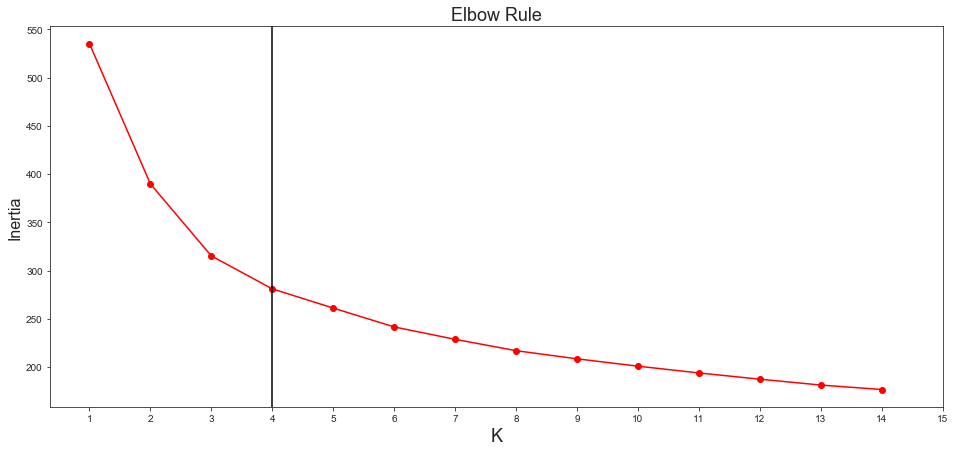

In [327]:
import matplotlib.pylab as plt
labels = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]


plt.figure(figsize=(16,7))
ax = plt.plot(lista_inertial,'ro-')

plt.title("Elbow Rule", fontsize=18)
plt.xlabel('K', fontsize=18)
plt.ylabel('Inertia', fontsize=16)
plt.xticks(np.arange(0, 15, step=1),labels = labels)

plt.axvline(3,color='black')

In [328]:
from sklearn.metrics import silhouette_score

lista_silhouette = []

for i in range(2,15):
    kmeans = KMeans(n_clusters=i, random_state=42,n_init=30)
    kmeans.fit(cluster_max_min_df)
    output = silhouette_score(cluster_max_min_df, kmeans.labels_)
    lista_silhouette.append(output)

    print(("For n_clusters = {} The average silhouette_score is :{:.2f}").format(i,output))

For n_clusters = 2 The average silhouette_score is :0.32
For n_clusters = 3 The average silhouette_score is :0.30
For n_clusters = 4 The average silhouette_score is :0.23
For n_clusters = 5 The average silhouette_score is :0.21
For n_clusters = 6 The average silhouette_score is :0.18
For n_clusters = 7 The average silhouette_score is :0.18
For n_clusters = 8 The average silhouette_score is :0.17
For n_clusters = 9 The average silhouette_score is :0.17
For n_clusters = 10 The average silhouette_score is :0.16
For n_clusters = 11 The average silhouette_score is :0.16
For n_clusters = 12 The average silhouette_score is :0.15
For n_clusters = 13 The average silhouette_score is :0.16
For n_clusters = 14 The average silhouette_score is :0.15


([<matplotlib.axis.XTick at 0x7fd5369d3b38>,
 <a list of 14 Text xticklabel objects>)

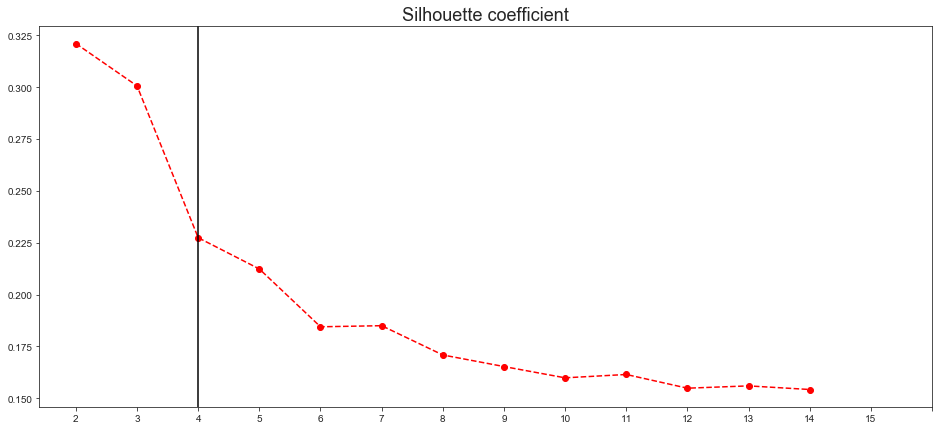

In [329]:
plt.figure(figsize=(16,7))
plt.plot(lista_silhouette,'ro--')
labels = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
plt.xticks(np.arange(2, 15, step=1),labels = labels)
plt.title("Silhouette coefficient",fontsize=18)
plt.axvline(2,color='black')

plt.xticks(np.arange(0, 15, step=1),labels = labels)

#my_xticks = [range(2,len(lista_silhouette))]

#plt.xticks( my_xticks)



In [330]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(cluster_max_min_df)
                for k in range(1, 10)]

silhouette_scores = [silhouette_score(cluster_max_min_df, model.labels_)
                     for model in kmeans_per_k[1:]]

inertias = [model.inertia_ for model in kmeans_per_k]

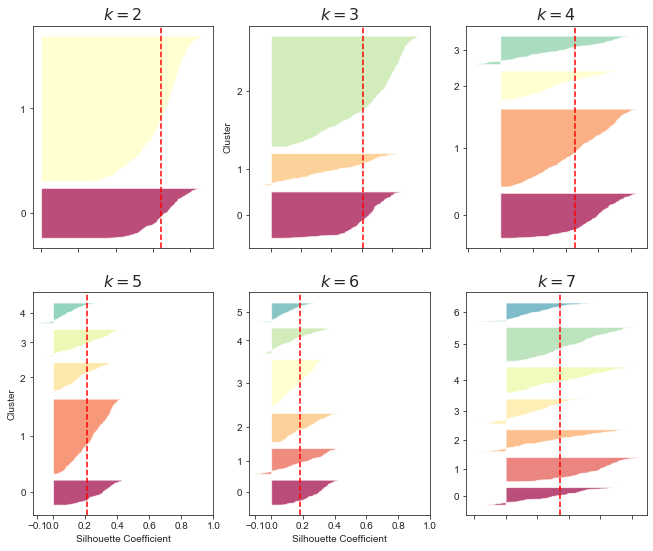

In [331]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
from sklearn.cluster import SpectralClustering

plt.figure(figsize=(11, 9))

for k in (2, 3, 4, 5, 6, 7):
    plt.subplot(2, 3, k - 1)
    
    y_pred = kmeans_per_k[k - 1].labels_        
    silhouette_coefficients = silhouette_samples(cluster_max_min_df, y_pred)    

    padding = len(cluster_max_min_df) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)
    
plt.show()

## Model definitive assignment

In [332]:
kmeans = KMeans(n_clusters=3, random_state=42,n_init=30,)
BGM_model = BayesianGaussianMixture(n_components=3, n_init=30, random_state=42)

BGM_model.fit(cluster_max_min_df)
kmeans.fit(cluster_max_min_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=30, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

## Label Assignment

In [333]:
select_df["CLUSTER"] = kmeans.labels_
    
#select_df["CLUSTER"] = BGM_model.predict(cluster_max_min_df)

### Statistic Convergence of Entropy for Each Cluster Assigned

In [334]:
#Harmonic mean

import scipy

select_df["hmean"] = scipy.stats.hmean(select_df[["S_15_IDADE"
        ,"S_21_AREA_PROPRIEDADE"
        ,"S_95_HÁ_QUANTO_TEMPO_PRODUZ_QUEIJO"
        ,"S_79_2_PREÇO_MÉDIO_RECEBIDO_QUEIJO_CANASTRA"
        ,"S_67_NÚMERO_TOTAL_REBANHO_LEITEIRO"
        ,"S_23_CASO_POSITIVO_QUANTOS_KVA"
        ,"WHEY_DAY"
        ,"CO_DAY"
        ,"TOTAL_WORKFORCE"
        ,"CHEESE_PROXY"
        ,"REVENUE_DAY"
        ,"TAX_DAY"]], axis=1, dtype=None)


lista_anova = []
for i in range(0,select_df["CLUSTER"].max()+1):

    lista_anova.append(
        select_df.loc[select_df["CLUSTER"]==0,"hmean"].values.reshape(-1,)
                    )
    
   

In [335]:
anova_0 = select_df.loc[select_df["CLUSTER"]==0,"hmean"]
anova_1 = select_df.loc[select_df["CLUSTER"]==1,"hmean"]
anova_2 = select_df.loc[select_df["CLUSTER"]==2,"hmean"]
#anova_3 = select_df.loc[select_df["CLUSTER"]==3,"hmean"]

In [336]:
import scipy.stats as stats

#stats.f_oneway(anova_0,anova_1,anova_2,anova_3)
stats.f_oneway(anova_0,anova_1,anova_2)

F_onewayResult(statistic=289.8830508828802, pvalue=4.111116185934636e-94)

Text(0, 0.5, 'Harmonic Mean')

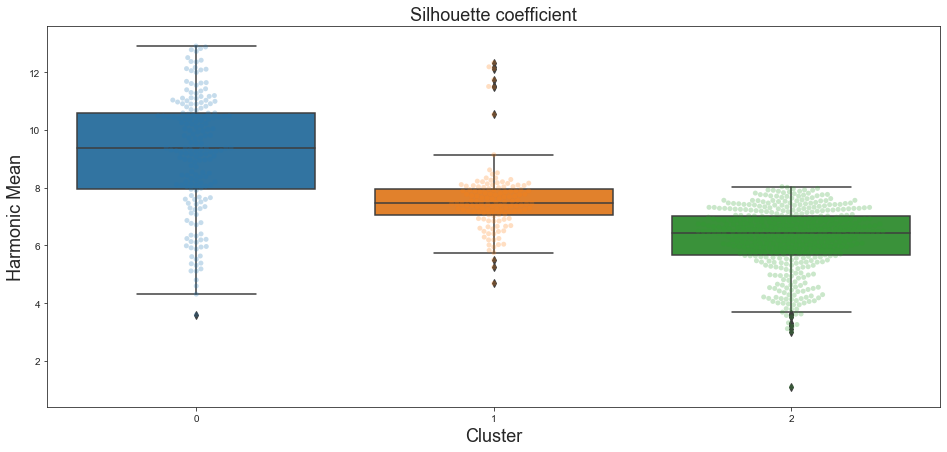

In [337]:
plt.figure(figsize=(16,7))
plt.title("Silhouette coefficient",fontsize=18)
sns.boxplot(data=select_df,x="CLUSTER",y="hmean")
sns.swarmplot(data=select_df,x="CLUSTER",y="hmean",alpha=0.25)

plt.xlabel('Cluster', fontsize=18)
plt.ylabel('Harmonic Mean', fontsize=18)

## Data Normalization (1 Ton of Cheese)

In [338]:
#Normalização

param_norm_div = ["S_21_AREA_PROPRIEDADE",
                "S_23_CASO_POSITIVO_QUANTOS_KVA",
                "S_67_NÚMERO_TOTAL_REBANHO_LEITEIRO",
                "TOTAL_WORKFORCE",
                  "WHEY_DAY",
                  "CO_DAY",
                  "REVENUE_DAY",
                  "TAX_DAY"]

for i in param_norm_div:
    select_df[i+"{}".format("_NORM")] = round(select_df[i] / (1000/select_df["CHEESE_PROXY"]),2)

## K Variables  Selection and Goals 

In [339]:
#K1 
#S_21_AREA_PROPRIEDADE_NORM MAX
#S_23_CASO_POSITIVO_QUANTOS_KVA_NORM MAX

#K2
#WHEY_DAY_NORM
#CO_DAY_NORM

#K3
#S_67_NÚMERO_TOTAL_REBANHO_LEITEIRO_NORM MAX
#REVENUE_DAY_NORM MAX

#K4
#TOTAL_WORKFORCE_NORM MAX
#S_95_HÁ_QUANTO_TEMPO_PRODUZ_QUEIJO MAX

#K5
#S_15_IDADE MIN
#TAX_DAY_NORM MAX

In [340]:
param_cluster_norm = ["S_21_AREA_PROPRIEDADE_NORM",
"S_23_CASO_POSITIVO_QUANTOS_KVA_NORM",
"S_67_NÚMERO_TOTAL_REBANHO_LEITEIRO_NORM",
"TOTAL_WORKFORCE_NORM",
"WHEY_DAY_NORM",
"CO_DAY_NORM",
"REVENUE_DAY_NORM",
"TAX_DAY_NORM"]

cluster_norm_df= select_df[param_cluster_norm]

In [349]:
kmeans = KMeans(n_clusters=3, random_state=42,n_init=30,)
BGM_model = BayesianGaussianMixture(n_components=3, n_init=30, random_state=42)

BGM_model.fit(cluster_norm_df)
kmeans.fit(cluster_norm_df)

cluster_norm_df["cluster_norm"] = BGM_model.predict(cluster_norm_df)

# Data Envelopment Analysis

## Data Input and Output Strategy 

In [350]:
cluster_1 = cluster_norm_df.loc[cluster_norm_df["cluster_norm"]==0,["S_21_AREA_PROPRIEDADE_NORM",
           "S_23_CASO_POSITIVO_QUANTOS_KVA_NORM",
           "S_67_NÚMERO_TOTAL_REBANHO_LEITEIRO_NORM",
           "TOTAL_WORKFORCE_NORM","WHEY_DAY_NORM",
                     "CO_DAY_NORM",
                     "REVENUE_DAY_NORM",
                     "TAX_DAY_NORM"]].mean()
    
cluster_2 = cluster_norm_df.loc[cluster_norm_df["cluster_norm"]==1,["S_21_AREA_PROPRIEDADE_NORM",
   "S_23_CASO_POSITIVO_QUANTOS_KVA_NORM",
   "S_67_NÚMERO_TOTAL_REBANHO_LEITEIRO_NORM",
   "TOTAL_WORKFORCE_NORM","WHEY_DAY_NORM",
             "CO_DAY_NORM",
             "REVENUE_DAY_NORM",
             "TAX_DAY_NORM"]].mean()


cluster_3 = cluster_norm_df.loc[cluster_norm_df["cluster_norm"]==2,["S_21_AREA_PROPRIEDADE_NORM",
       "S_23_CASO_POSITIVO_QUANTOS_KVA_NORM",
       "S_67_NÚMERO_TOTAL_REBANHO_LEITEIRO_NORM",
       "TOTAL_WORKFORCE_NORM","WHEY_DAY_NORM",
                 "CO_DAY_NORM",
                 "REVENUE_DAY_NORM",
                 "TAX_DAY_NORM"]].mean()

# cluster_4 = select_df.loc[select_df["CLUSTER"]==3,["S_21_AREA_PROPRIEDADE_NORM",
#        "S_23_CASO_POSITIVO_QUANTOS_KVA_NORM",
#        "S_67_NÚMERO_TOTAL_REBANHO_LEITEIRO_NORM",
#        "TOTAL_WORKFORCE_NORM","WHEY_DAY_NORM",
#                  "CO_DAY_NORM",
#                  "REVENUE_DAY_NORM",
#                  "TAX_DAY_NORM"]].mean()

#cluster_dea_df = pd.concat([cluster_1,cluster_2,cluster_3,cluster_4],axis=1).T

cluster_dea_df = pd.concat([cluster_1,cluster_2,cluster_3],axis=1).T

cluster_dea_df.index.rename("Cluster",inplace=True)

In [351]:
model_2 = dea.DEAProblem(inputs = inputs, outputs = outputs, returns='CRS')

In [352]:
model_2_results = model_2.solve()

In [353]:
model_2_results["Status"]

Cluster
0    Optimal
1    Optimal
2    Optimal
Name: Status, dtype: object

In [354]:
#Ranking
model_2_results['Efficiency']

Cluster
0    0.994722
1    1.000000
2    1.000000
Name: Efficiency, dtype: float64

In [355]:
#Beta Weights
model_2_results['Weights']

,in_S_21_AREA_PROPRIEDADE_NORM,in_S_23_CASO_POSITIVO_QUANTOS_KVA_NORM,in_S_67_NÚMERO_TOTAL_REBANHO_LEITEIRO_NORM,in_TOTAL_WORKFORCE_NORM,out_WHEY_DAY_NORM,out_CO_DAY_NORM,out_REVENUE_DAY_NORM,out_TAX_DAY_NORM
0,0.000000,0.0,0.903388,0.0,0.0,0.011282,0.0,0.000000
1,0.465699,0.0,2.193899,0.0,0.0,0.000000,0.0,2.151627
2,0.000000,0.0,0.431439,0.0,0.0,0.005388,0.0,0.000000


Text(0.5, 1.0, 'Distribution of efficiency scores')

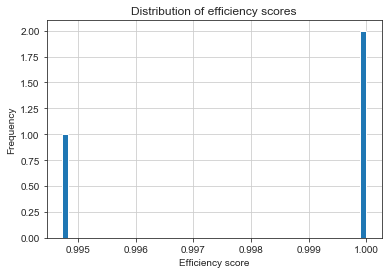

In [356]:
model_2_results['Efficiency'].hist(bins=50)
plt.ylabel('Frequency')
plt.xlabel('Efficiency score')
plt.title('Distribution of efficiency scores')